In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import visuals as vs
from sklearn.metrics import r2_score
from pandas import DataFrame
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

features = pd.read_csv("F:\\ML\\MultiTarget\\features.csv")
target   = pd.read_csv("F:\\ML\\MultiTarget\\targets.csv")


In [20]:
for i in features.columns:
    if(features[i].dtypes == 'object'):
        print(features[i].dtypes)
    
features.head()

object
object
object


,Set,Profile,expressivity,class_count,indiv_count,obj_property_count,dataproperty_count,datatypes_count,Cyclic Cls,HC_Cohesion,...,ReflexiveObjectProperty,InverseFunctionalObjectProperty,EquivalentDataProperties,SameIndividual,EquivalentObjectProperties,SubDataPropertyOf,FunctionalDataProperty,IrrefexiveObjectProperty,AsymmetricObjectProperty,DisjointObjectProperties
0,Train,DL,ALEHIF+,2748,0,413,0,0,0.005,0.004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Train,EL,ALEH,2748,0,413,0,0,0.000,0.004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Train,DL,SRIQ,56632,0,198,0,0,0.435,0.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Train,DL,SRIF,36495,0,17,0,0,0.719,0.003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Train,DL,ALUOI(D),84,5,11,6,2,0.000,0.079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
def df_lbl_enc(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            df[c] = lbl.fit_transform(df[c])
            df[c] = df[c]
            #print(c)
    return df
def df_normalize(df):
    for c in df.columns:
        #if df[c].dtypes != 'object':
            #print(c)
            df[c] = df[c] - df[c].min() / (df[c].max() - df[c].min());
            #df[c] = stats.boxcox(df[c])
    return df

def df_de_normalize(df):
    for c in df.columns:
        #if df[c].dtypes != 'object':
            #print(c)
            df[c] = df[c] * (df[c].max() - df[c].min()) + df[c].min();
            #df[c] = stats.boxcox(df[c])
    return df



train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.50, random_state=42)
features_cols = [c for c in features if c not in ['Set','Profile']]
target_cols =   ['Konclude_RT','More_RT', 'Hermit_RT', 'Fact++_RT', 'TrOWL_RT', 'JFact_RT']

train_features = (df_lbl_enc(train_features[features_cols]))
test_features  = (df_lbl_enc(test_features[features_cols]))

train_target   = (train_target[target_cols])
test_target    = (test_target[target_cols])

C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
test_features  = test_features.reset_index(drop = True)
train_features = train_features.reset_index(drop = True)
test_target    = test_target.reset_index(drop = True)
train_target   = train_target.reset_index(drop = True)

In [17]:

import collections
from collections import Counter

def out_lier_detector(df1,df2):
    outlier_list = []
    outliers_list = []
    
    for feature in df1.keys():

        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        #print log_data[feature]
        Q1 = np.percentile(df1[feature], 25)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(df1[feature], 75)

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3-Q1)*1.5

        # Display the outliers
        #print "Data points considered outliers for the feature '{}':".format(feature)

        outlier_list = df1[~((df1[feature] >= Q1 - step) & (df1[feature] <= Q3 + step))]
        outliers_list = outliers_list + outlier_list.index.tolist()

    # OPTIONAL: Select the indices for data points you wish to remove
    outliers  = outliers_list
    #print(outliers)
    counter = collections.Counter(outliers).most_common(100)
    #print(counter)
    outliers = [k for k in (x[0] for x in counter)]

    # Remove the outliers, if any were specified
    data1 = df1.drop(df1.index[outliers]).reset_index(drop = True)
    data2 = df2.drop(df2.index[outliers]).reset_index(drop = True)
    
    return data1,data2

In [18]:
train_features_o,train_target_o = out_lier_detector(train_features,train_target)
test_features_o,test_target_o = out_lier_detector(test_features,test_target)
#dict = [k for k in (x[0] for x in otlist1)]

In [388]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(train_features_o)
myf = pca.transform(train_features_o)

pca.fit(test_features_o)
myt = pca.transform(test_features_o)


In [386]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=100,
                           max_iter=150, shuffle=True, random_state=1,
                           activation='relu')
mlp.fit(train_features_o, train_target_o['Konclude_RT'])
mlp.score(test_features_o, test_target_o['Konclude_RT'])

-0.21605985361264324

C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

(1087, 39)
Konclude_RT 0.758736050804
More_RT 0.725792524288
Hermit_RT 0.743354396497
Fact++_RT 0.709968040856
TrOWL_RT 0.665354205709
JFact_RT 0.652648591619
JFact_RT 0.724844599128


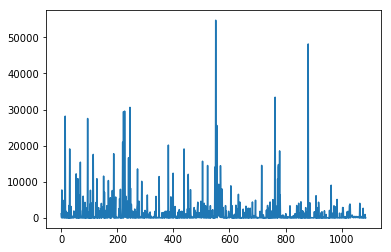

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel



'''
regp = Pipeline([
  ('feature_selection', SelectFromModel(RandomForestRegressor(70))),
  ('regresion', RandomForestRegressor(70))
])
regp.fit(train_features, train_target['Konclude_RT'])
print(regp.score(test_features, test_target['Konclude_RT']))

'''


X = df_normalize(df_lbl_enc(features[features_cols]))
y = df_normalize(df_lbl_enc(target[target_cols]))

regp = RandomForestRegressor().fit(X[features_cols],y)
model = SelectFromModel(regp, prefit=True)
X_new = model.transform(X[features_cols])
print(X_new.shape)

train_features, test_features, train_target, test_target = train_test_split(X_new, y, test_size=.900, random_state=42)


for i in train_target.columns:
    regp = RandomForestRegressor().fit(X_new, y[i])
    #print(X_new)
    print(i,regp.score(X_new, y[i]))
    
regp = RandomForestRegressor().fit(X_new, y)
#print(X_new)
print(i,regp.score(X_new, y))


y['Konclude_RT'].plot()

In [325]:
clf1 = RandomForestRegressor(100).fit(train_features_o[['NPCD', 'ExactCardinality', 'Cyclic Cls', 'ClassAssertion']], train_target_o['Konclude_RT'])
print(clf1.score(test_features_o[['NPCD', 'ExactCardinality', 'Cyclic Cls', 'ClassAssertion']], test_target_o['Konclude_RT']))

features_list = train_features.columns.tolist()
importances = clf1.feature_importances_
p = np.vstack((features_list,importances))

df = pd.DataFrame(p.transpose(),columns=['name','importance'])
dfsorted = df.sort_values(['importance'], ascending=False)
dfsorted['name']=df['name'].astype(str)
dfsorted['importance']=df['importance'].astype(float)

print(dfsorted.dtypes)

best_col = dfsorted.loc[dfsorted['importance'] > 0.01]

print(best_col['name'].tolist())

-1.62375850785


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = RandomForestRegressor(50)

submission_binary = pd.DataFrame()
for label in target_cols:
    # print('... Processing {}'.format(label))
    y = np.log1p(train_target[label])
    test_y = np.log1p(test_target[label])
    # train the model using X_dtm & y
    logreg.fit(np.log1p(train_features), y)
    # compute the training accuracy
    y_pred_X = logreg.predict(np.log1p(train_features))
    #print('Training accuracy is ',accuracy_score(y, y_pred_X))
    print('Training accuracy is ',logreg.score(np.log1p(train_features), y))
    print('testing accuracy is ',logreg.score(np.log1p(test_features),test_y))
    # compute the predicted probabilities for X_test_dtm
    #test_y_prob = logreg.predict_proba(test_features)
   # submission_binary[label] = test_y_prob

Training accuracy is  0.758127907082
testing accuracy is  -0.174134277223
Training accuracy is  0.784522851265
testing accuracy is  -0.223895271323
Training accuracy is  0.780370990424
testing accuracy is  -0.246554559713
Training accuracy is  0.763143494911
testing accuracy is  -0.199837035472
Training accuracy is  0.787150979349
testing accuracy is  -0.194018062826
Training accuracy is  0.787883826577
testing accuracy is  -0.07251366214


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = RandomForestRegressor(100)

submission_binary = pd.DataFrame()
for label in target_cols:
    # print('... Processing {}'.format(label))
    y = np.log1p(train_target_o[label])
    test_y = np.log1p(test_target_o[label])
    # train the model using X_dtm & y
    logreg.fit(np.log1p(train_features_o), y)
    # compute the training accuracy
    y_pred_X = logreg.predict(np.log1p(train_features_o))
    #print('Training accuracy is ',accuracy_score(y, y_pred_X))
    print('Training accuracy is ',logreg.score(np.log1p(train_features_o), y))
    print('testing accuracy is ',logreg.score(np.log1p(test_features_o),test_y))
    # compute the predicted probabilities for X_test_dtm
    #test_y_prob = logreg.predict_proba(test_features)
   # submission_binary[labetest_features_ol] = test_y_prob

Training accuracy is  0.770241610561
testing accuracy is  -0.102198237474
Training accuracy is  0.788266119455
testing accuracy is  -0.164067195395
Training accuracy is  0.783930764941
testing accuracy is  -0.217468142479
Training accuracy is  0.77560280386
testing accuracy is  -0.141375345317
Training accuracy is  0.786866971992
testing accuracy is  -0.224902267779
Training accuracy is  0.802538592875
testing accuracy is  -0.0907650963603


In [234]:
clf1 = RandomForestRegressor(100).fit(train_features, train_target)
print(clf1.score(test_features,test_target))

clf1 = RandomForestRegressor(100).fit(train_features_o, train_target_o)
print(clf1.score(test_features_o,test_target_o))

-0.362048023538
-0.316116980672


In [235]:
forest = RandomForestRegressor(n_estimators=60, random_state=1)
multi_target_forest = MultiOutputRegressor(forest, n_jobs=-1)
print(multi_target_forest.fit(train_features, train_target).score(test_features,test_target))
print(r2_score(test_target,multi_target_forest.predict(test_features)))

print(multi_target_forest.fit(train_features_o, train_target_o).score(test_features_o,test_target_o))
print(r2_score(test_target_o,multi_target_forest.predict(test_features_o)))

-0.513196688935


C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


-0.405669604699
-0.499304143544
-0.34655504038


C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
logreg = RandomForestRegressor(50)

submission_binary = pd.DataFrame()
for label in target_cols:
    # print('... Processing {}'.format(label))
    y = np.log1p(train_target_o[label])
    test_y = np.log1p(test_target_o[label])
    # train the model using X_dtm & y
    
    logreg.fit(np.log1p(train_features_o), y)
    # compute the training accuracy
    y_pred_X = logreg.predict(np.log1p(train_features_o))
    
    print('r2score is ',r2_score(y,(y_pred_X)))
    print('Training accuracy is ',logreg.score(np.log1p(train_features_o), y))
    print('testing accuracy is ',logreg.score(np.log1p(test_features_o),test_y))
    lpred = label + 'new'
    train_features_o[lpred] = logreg.predict(np.log1p(train_features_o))
    test_features_o[lpred] = logreg.predict(np.log1p(test_features_o))
    # compute the predicted probabilities for X_test_dtm
    #test_y_prob = logreg.predict_proba(test_features)
   # submission_binary[labetest_features_ol] = test_y_prob

r2score is  0.915426439441
Training accuracy is  0.915426439441
testing accuracy is  -0.33739336969
r2score is  0.933191178553
Training accuracy is  0.933191178553
testing accuracy is  -0.184923151582
r2score is  0.923679662872
Training accuracy is  0.923679662872
testing accuracy is  -0.241654780086
r2score is  0.924608205154
Training accuracy is  0.924608205154
testing accuracy is  -0.541911890362
r2score is  0.927468692608
Training accuracy is  0.927468692608
testing accuracy is  -0.424476466203
r2score is  0.942883936978
Training accuracy is  0.942883936978
testing accuracy is  -0.796977467531


In [448]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=400, random_state=4)

X_train = train_features.values
X_test = test_features.values
y_train = train_target['Konclude_RT'].values
y_test = test_target['Konclude_RT'].values


#print(X_train.shape, y_train.shape, X_test.shape , y_test.shape)


In [461]:

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=110)
neigh.fit(X_train, y_train) 
y_rf = neigh.predict(X_test)

print(r2_score(y_test, y_rf))

'''
for x in range(1000,1500,100):
    #regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=x,  random_state=2))
    #regr_multirf.fit(X_train, y_train)

    regr_rf = RandomForestRegressor(n_estimators=x,  random_state=2)
    regr_rf.fit(X_train, y_train)

    # Predict on new data
    #y_multirf = regr_multirf.predict(X_test)
    y_rf = regr_rf.predict(X_test)
    y_rf_train = regr_rf.predict(X_train)
    
    print(r2_score(y_test, y_rf, multioutput='variance_weighted'),'|||', r2_score(y_train, y_rf_train, multioutput='variance_weighted'))
    #print(regr_multirf.score(X_train, y_train),regr_rf.score(X_train, y_train),regr_multirf.score(X_test, y_test),regr_rf.score(X_test, y_test))
'''

0.00173144158203


"\nfor x in range(1000,1500,100):\n    #regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=x,  random_state=2))\n    #regr_multirf.fit(X_train, y_train)\n\n    regr_rf = RandomForestRegressor(n_estimators=x,  random_state=2)\n    regr_rf.fit(X_train, y_train)\n\n    # Predict on new data\n    #y_multirf = regr_multirf.predict(X_test)\n    y_rf = regr_rf.predict(X_test)\n    y_rf_train = regr_rf.predict(X_train)\n    \n    print(r2_score(y_test, y_rf, multioutput='variance_weighted'),'|||', r2_score(y_train, y_rf_train, multioutput='variance_weighted'))\n    #print(regr_multirf.score(X_train, y_train),regr_rf.score(X_train, y_train),regr_multirf.score(X_test, y_test),regr_rf.score(X_test, y_test))\n"

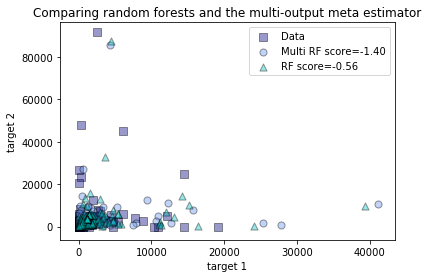

In [369]:
max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=40,  random_state=2, oob_score=True))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=30,  random_state=40, oob_score=True)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
#plt.xlim([-6, 6])
#plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()